In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df['target_name'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target target_name  
0

In [ ]:
X = iris_df[iris['feature_names']]
y = iris_df['target_name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
accuracy = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Accuracy with n_estimators(10):",accuracy)
print("Classification Report:\n", report)

Accuracy with n_estimators(10): 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.86      0.86      0.86        14
   virginica       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [ ]:
rf = RandomForestClassifier(n_estimators=15)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
accuracy = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Accuracy with n_estimators(15):",accuracy)
print("Classification Report:\n", report)

Accuracy with n_estimators(15): 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.86      0.86      0.86        14
   virginica       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
accuracy = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Accuracy with n_estimators(20):",accuracy)
print("Classification Report:\n", report)

Accuracy with n_estimators(20): 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.86      0.86      0.86        14
   virginica       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



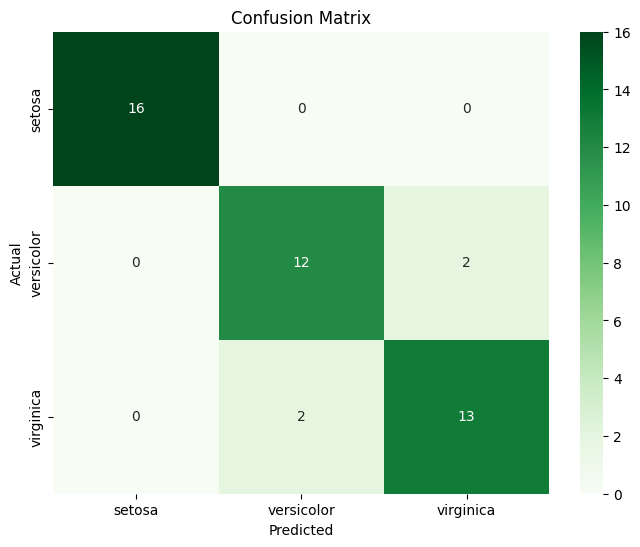

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greens",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


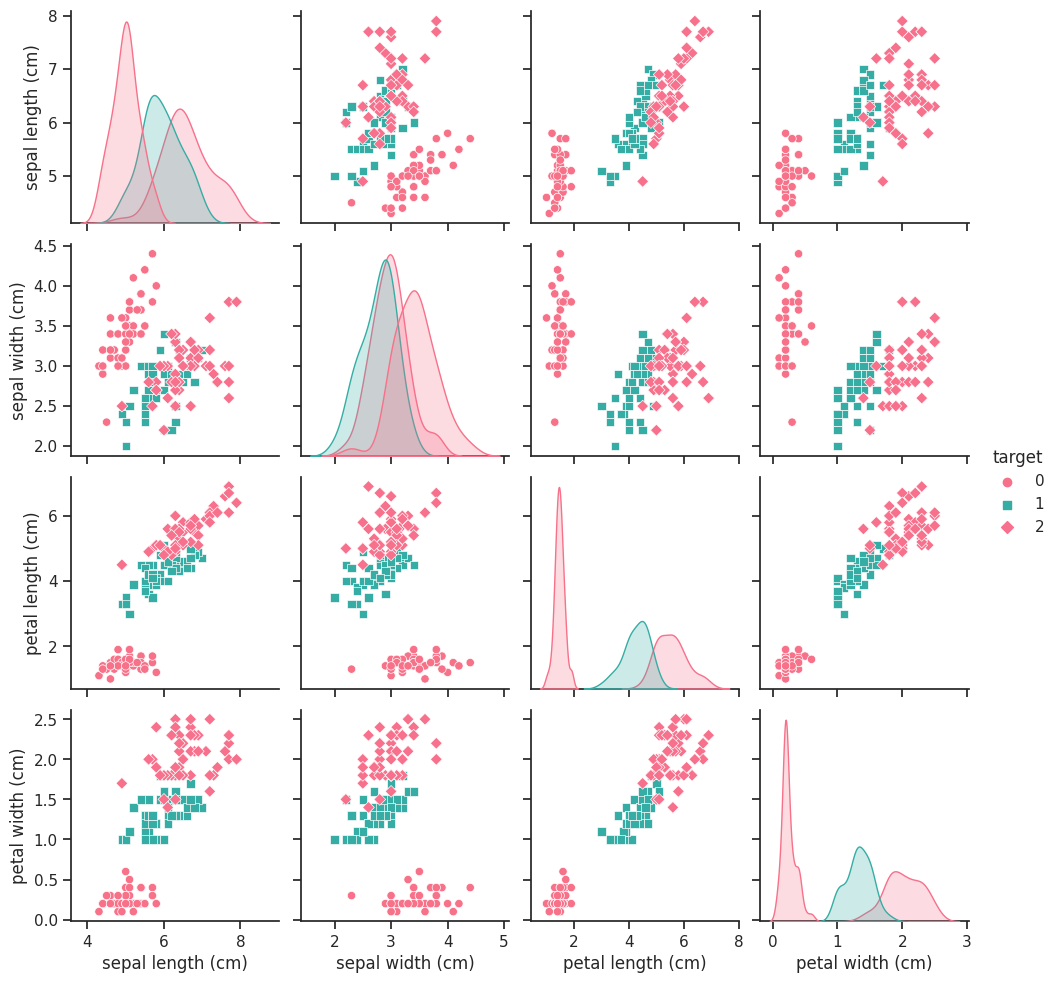

In [ ]:
sns.set(style="ticks")
sns.pairplot(iris_df, hue="target", palette="husl", markers=["o", "s", "D"])
plt.show()

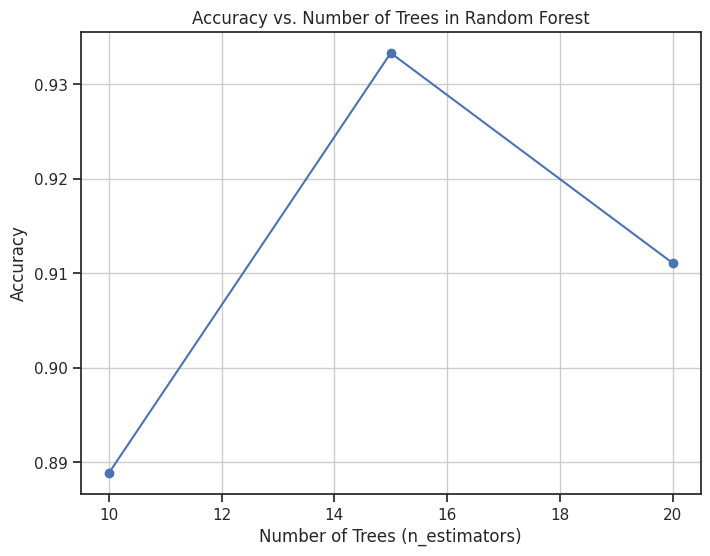

In [ ]:
# Initialize lists to store accuracy values
n_estimators_values = [10, 15, 20]  # Different numbers of trees
accuracy_values = []

# Loop through different numbers of trees
for n_estimators in n_estimators_values:
    # Create and fit the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot accuracy vs. number of trees
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()